In [1]:
%matplotlib ipympl

import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters

FILE_NAME = 'trajectory.csv'
    

In [3]:
def cylindrical_generator(r, v, time):
    
    dt = time[1] - time[0]

    theta = 2 * np.pi * np.random.random()
    h = np.random.random() - 0.5
    theta_v, h_v = v
    
    data = list()
    
    for t in time:
        x, y, z = r * np.cos(theta), r * np.sin(theta), h
        theta += theta_v * dt
        h += h_v * dt
        data.append([t, x, y, z])
    
    return np.array(data)
    
def spherical_generator(r, v, time):
    
    dt = time[1] - time[0]

    theta = 2 * np.pi * np.random.random()
    phi = 2 * np.pi * np.random.random()
    theta_v, phi_v = v
    
    data = list()
    
    for t in time:
        x, y, z = r * np.cos(phi) * np.cos(theta), r * np.cos(phi) * np.sin(theta), r * np.sin(phi)
        theta += theta_v * dt
        phi += phi_v * dt
        data.append([t, x, y, z])
    
    return np.array(data)

def cylindrical_generator_random_inertial(r, v, time):
    
    dt = time[1] - time[0]

    theta = 2 * np.pi * np.random.random()
    h = np.random.random() - 0.5
    theta_v, h_v = v
    
    data = list()
    
    for t in time:
        x, y, z = r * np.cos(theta), r * np.sin(theta), h
        theta_v += (np.random.random() - 0.5)
        h_v += (np.random.random() - 0.5)
        theta += theta_v * dt
        h += h_v * dt
        data.append([t, x, y, z])
    
    return np.array(data)

def spherical_generator_random_inertial(r, v, time):
    
    dt = time[1] - time[0]

    theta = 2 * np.pi * np.random.random()
    phi = 2 * np.pi * np.random.random()
    theta_v, phi_v = v
    
    data = list()
    
    for t in time:
        x, y, z = r * np.cos(phi) * np.cos(theta), r * np.cos(phi) * np.sin(theta), r * np.sin(phi)
        theta_v += (np.random.random() - 0.5)
        phi_v += (np.random.random() - 0.5)
        theta += theta_v * dt
        phi += phi_v * dt
        data.append([t, x, y, z])
    
    return np.array(data)

def random_inertial(v, time):
    
    dt = time[1] - time[0]

    x, y, z = 0, 0, 0
#     v_x = (np.random.random() - 0.5)
#     v_y = (np.random.random() - 0.5)
#     v_z = (np.random.random() - 0.5)
    v_x, v_y, v_z = v
    
    data = list()
    
    for t in time:
        x += v_x * dt 
        y += v_y * dt
        z += v_z * dt
        v_x += (np.random.random() - 0.5) / 10
        v_y += (np.random.random() - 0.5) / 10
        v_z += (np.random.random() - 0.5) / 10

        data.append([t, x, y, z])
    
    return np.array(data)

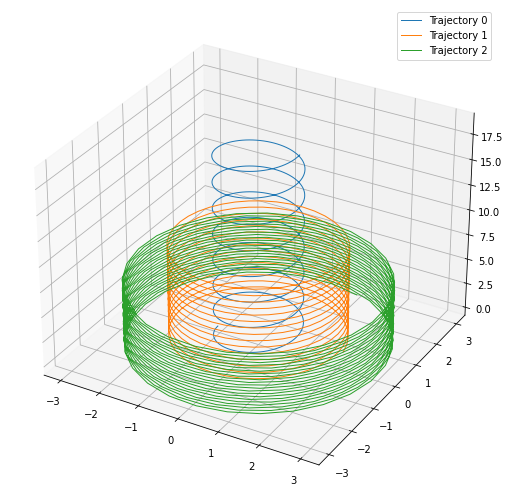

In [4]:
# Cylinderical Generator Test

fs = 20
dt = 1/fs

time = np.arange(0, 30, dt)

fig = plt.figure(figsize=(9, 9))
ax = fig.gca(projection='3d')

for i in range(3):
    
    r = i + 1
    theta_v = 2 * np.pi * (i + 1) / 4
    h_v = 1 / theta_v

    data = cylindrical_generator(r, (theta_v, h_v), time)
    ax.plot(data[:, 1], 
            data[:, 2], 
            data[:, 3], 
            linewidth=1,
            label=f'Trajectory {i}')

ax.legend()

plt.show()

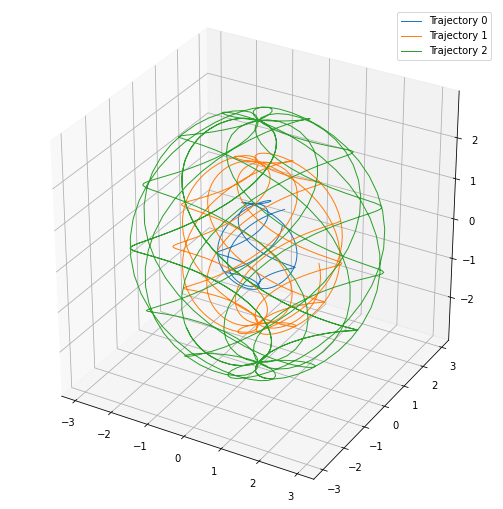

In [5]:
# Spherical Generator Test

fs = 20
dt = 1/fs

time = np.arange(0, 30, dt)

fig = plt.figure(figsize=(9, 9))
ax = fig.gca(projection='3d')

for i in range(3):
    
    r = i + 1
    theta_v = 2 * np.pi * (i + 1) / 7
    phi_v = 2 * np.pi * (i + 1) / 11

    data = spherical_generator(r, (theta_v, phi_v), time)
    ax.plot(data[:, 1], 
            data[:, 2], 
            data[:, 3], 
            linewidth=1,
            label=f'Trajectory {i}')

ax.legend()
ax.set_box_aspect((1, 1, 1))

plt.show()

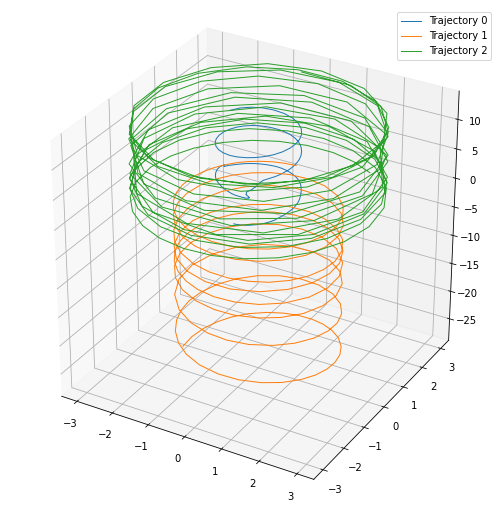

In [6]:
# Cylinderical Generator Random Inertial Test

fs = 20
dt = 1/fs

time = np.arange(0, 10, dt)

fig = plt.figure(figsize=(9, 9))
ax = fig.gca(projection='3d')

for i in range(3):
    
    r = i + 1
    theta_v = 2 * np.pi * (i + 1) / 4
    h_v = 1 / theta_v

    data = cylindrical_generator_random_inertial(r, (theta_v, h_v), time)
    ax.plot(data[:, 1], 
            data[:, 2], 
            data[:, 3], 
            linewidth=1,
            label=f'Trajectory {i}')

ax.legend()
ax.set_box_aspect((1, 1, 1))

plt.show()

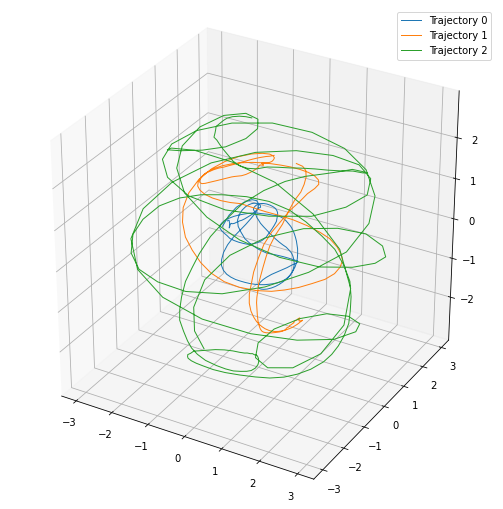

In [7]:
# Spherical Generator Random Inertial Test

fs = 20
dt = 1/fs

time = np.arange(0, 10, dt)

fig = plt.figure(figsize=(9, 9))
ax = fig.gca(projection='3d')

for i in range(3):
    
    r = i + 1
    theta_v = 2 * np.pi * (i + 1) / 13
    phi_v = 2 * np.pi * (i + 1) / 17

    data = spherical_generator_random_inertial(r, (theta_v, phi_v), time)
    ax.plot(data[:, 1], 
            data[:, 2], 
            data[:, 3], 
            linewidth=1,
            label=f'Trajectory {i}')

ax.legend()
ax.set_box_aspect((1, 1, 1))

plt.show()

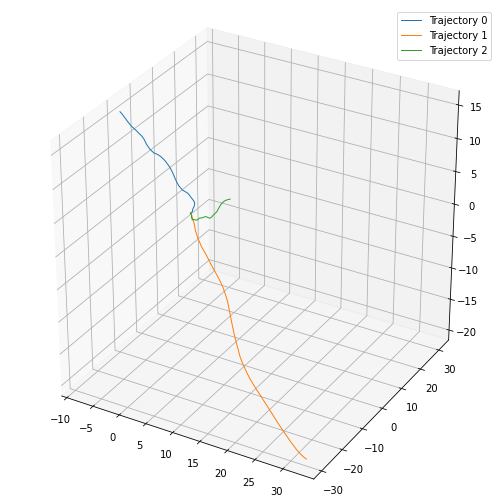

In [8]:
# Random Inertial Test

fs = 20
dt = 1/fs

time = np.arange(0, 30, dt)

fig = plt.figure(figsize=(9, 9))
ax = fig.gca(projection='3d')

for i in range(3):
    
    v_x = (np.random.random() - 0.5)
    v_y = (np.random.random() - 0.5)
    v_z = (np.random.random() - 0.5)

    data = random_inertial((v_x, v_y, v_z), time)
    ax.plot(data[:, 1], 
            data[:, 2], 
            data[:, 3], 
            linewidth=1,
            label=f'Trajectory {i}')

ax.legend()
ax.set_box_aspect((1, 1, 1))

plt.show()

In [9]:
# WRITE CSV

with open(FILE_NAME, 'w') as f:
    csv_writer = csv.writer(f)
    csv_writer.writerow(['time', 'x', 'y', 'z'])
    
    print(f'* data.shape: {data.shape}')
    
    for line in data:
        csv_writer.writerow(line)
    
    print(f'* Wrote {len(data)} lines in {FILE_NAME}')
    

* data.shape: (600, 4)
* Wrote 600 lines in trajectory.csv


In [10]:
# READ CSV

data_loaded = list()

with open(FILE_NAME, 'r') as f:
    csv_reader = csv.reader(f)
    
    col_name = next(csv_reader)
    
    line_count = 0
    
    for line in csv_reader:
        data_loaded.append([float(value) for value in line])
        line_count += 1

    data_loaded = np.array(data_loaded)
        
    print(f'* Read {line_count} lines from {FILE_NAME}')
    print(f'* data.shape: {data_loaded.shape}')

* Read 600 lines from trajectory.csv
* data.shape: (600, 4)


* Read 600 lines from trajectory.csv
* data.shape: (600, 4)


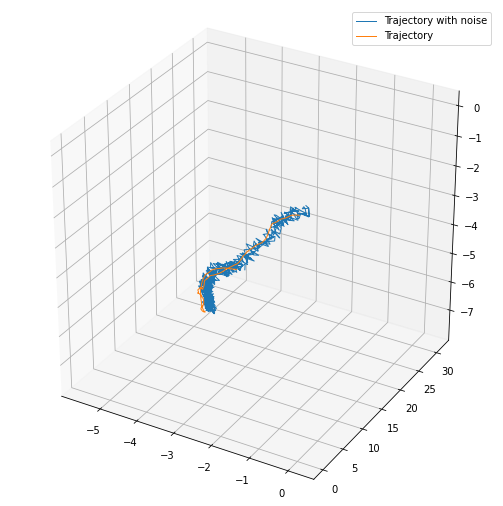

In [11]:
data_loaded = list()

with open(FILE_NAME, 'r') as f:
    csv_reader = csv.reader(f)
    
    col_name = next(csv_reader)
    
    line_count = 0
    
    for line in csv_reader:
        data_loaded.append([float(value) for value in line])
        line_count += 1

    data_loaded = np.array(data_loaded)
        
    print(f'* Read {line_count} lines from {FILE_NAME}')
    print(f'* data.shape: {data_loaded.shape}')

# Noise = Bias + White Noise
    
bias = 1/5 * np.random.random()
random_noise = 1/3 * (np.random.random(data_loaded.shape) - 0.5)
data_with_noised = data_loaded + random_noise + bias

fig = plt.figure(figsize=(9, 9))
ax = fig.gca(projection='3d')

ax.plot(data_with_noised[:, 1], 
        data_with_noised[:, 2], 
        data_with_noised[:, 3], 
        linewidth=1,
        label=f'Trajectory with noise')

ax.plot(data_loaded[:, 1], 
        data_loaded[:, 2], 
        data_loaded[:, 3], 
        linewidth=1,
        label=f'Trajectory')

ax.legend()
ax.set_box_aspect((1, 1, 1))

plt.show()

* Read 600 lines from trajectory.csv
* data.shape: (600, 4)


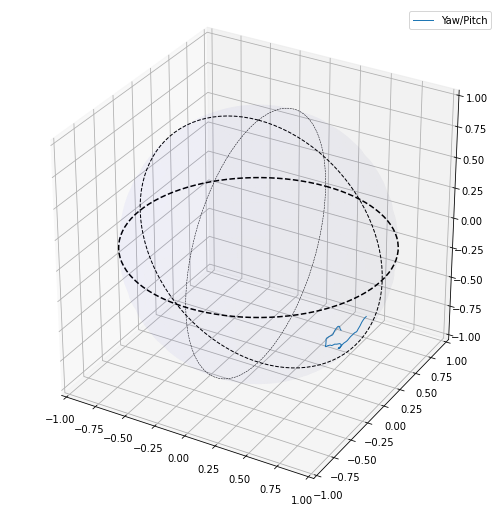

In [12]:
# position-to-Yaw/Pitch

data_loaded = list()

with open(FILE_NAME, 'r') as f:
    csv_reader = csv.reader(f)
    
    col_name = next(csv_reader)
    
    line_count = 0
    
    for line in csv_reader:
        data_loaded.append([float(value) for value in line])
        line_count += 1

    data_loaded = np.array(data_loaded)
        
    print(f'* Read {line_count} lines from {FILE_NAME}')
    print(f'* data.shape: {data_loaded.shape}')

yaw_pitch_data = list()
unit_circle_data = list()

for data in data_loaded:
    t, x, y, z = data
    r = np.sqrt(x ** 2 + y ** 2 + z ** 2)
    
    theta = np.arctan2(x, y)
    phi = np.arcsin(z / r)
    
    yaw_pitch_data.append([t, theta, phi])
    
    unit_circle_data.append([t, 
                             1 * np.cos(phi) * np.cos(theta), 
                             1 * np.cos(phi) * np.sin(theta), 
                             1 * np.sin(phi)])
    
yaw_pitch_data = np.array(yaw_pitch_data)
unit_circle_data = np.array(unit_circle_data)

fig = plt.figure(figsize=(9, 9))
ax = fig.gca(projection='3d')

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
w = np.zeros(len(u))

x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.02)
ax.plot(np.sin(u), np.cos(u), w, color='k', linewidth=1.5, linestyle = 'dashed')
ax.plot(np.sin(u), w, np.cos(u), color='k', linewidth=1, linestyle = 'dashed')
ax.plot(w, np.sin(u), np.cos(u), color='k', linewidth=.5, linestyle = 'dashed')

ax.plot(unit_circle_data[:, 1], 
        unit_circle_data[:, 2], 
        unit_circle_data[:, 3], 
        linewidth=1,
        label=f'Yaw/Pitch')


# ax.plot(a[0] * np.sin(u) + b[0] * np.cos(u), 
#         b[1] * np.cos(u), a[2] * np.sin(u) + b[2] * np.cos(u),
#         color='k', linestyle = 'dashed')

# ax.plot(a[0] * np.sin(vert_front) + b[0] * np.cos(vert_front), 
#         b[1] * np.cos(vert_front), a[2] * np.sin(vert_front) + b[2] * np.cos(vert_front),
#         color='k')

ax.legend()
ax.set_xlim3d([-1, 1])
ax.set_ylim3d([-1, 1])
ax.set_zlim3d([-1, 1])
ax.set_box_aspect((1, 1, 1))

plt.show()

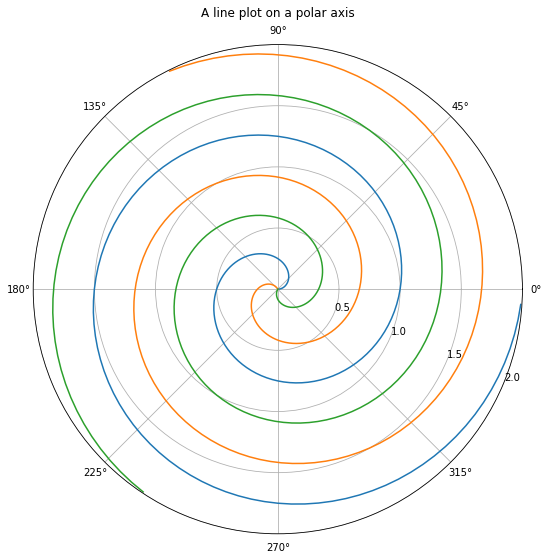

In [13]:
# https://matplotlib.org/examples/pylab_examples/polar_demo.html

r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

plt.figure(figsize=(9, 9))
ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.plot(theta + np.pi * 2/3, r)
ax.plot(theta + np.pi * 4/3, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

In [14]:
# .mat data format
import scipy.io as sio

mdict = {'data': data}
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.savemat.html#scipy.io.savemat
sio.savemat("trajectory.mat", mdict)

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html#scipy.io.loadmat
loaded_mdict = sio.loadmat("trajectory.mat")
print(f'* Keys in loaded_mdict == {loaded_mdict.keys()}')

loaded_data = loaded_mdict['data']
print(f'* Loaded mat data shape: {loaded_data.shape}')

* Keys in loaded_mdict == dict_keys(['__header__', '__version__', '__globals__', 'data'])
* Loaded mat data shape: (1, 4)


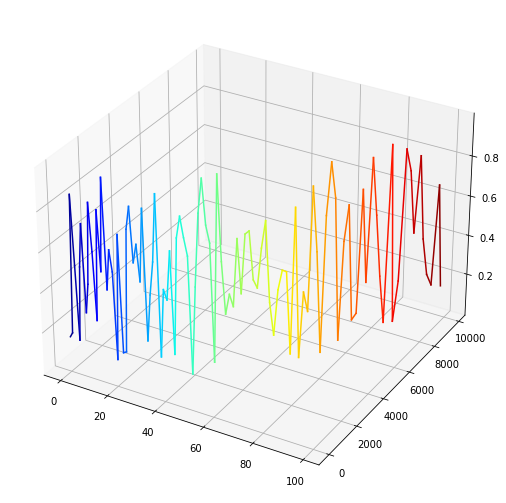

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

N = 100 # number of points
x = np.arange(N, dtype=float) # x,y,z = 1d arrays
y = x * x
z = np.random.rand(N)

fig = plt.figure(figsize=(9, 9))
ax = fig.gca(projection='3d')

# you have to plot segments, its means your arguments
# have to be a slice of arrays like here: from x(i-1) to x(i) => x[i-1:i+1]
# to get color from colormap use index: 0 <= i <= 1
for i in range(1,N):
    ax.plot(x[i-1:i+1], y[i-1:i+1], z[i-1:i+1], c = plt.cm.jet(1. * i / N))

plt.show()

* Read 600 lines from trajectory.csv
* data.shape: (600, 4)


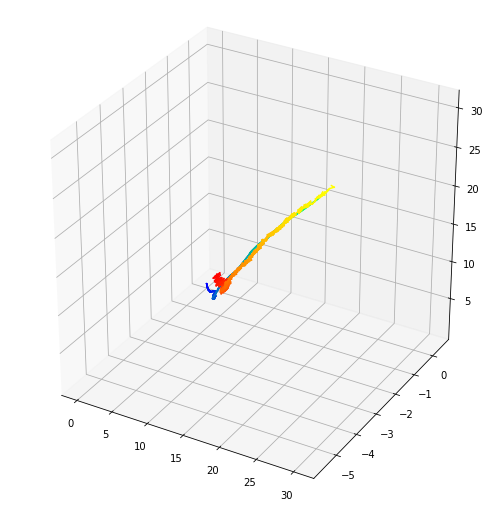

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data_loaded = list()

with open(FILE_NAME, 'r') as f:
    csv_reader = csv.reader(f)
    
    col_name = next(csv_reader)
    
    line_count = 0
    
    for line in csv_reader:
        data_loaded.append([float(value) for value in line])
        line_count += 1

    data_loaded = np.array(data_loaded)
        
    print(f'* Read {line_count} lines from {FILE_NAME}')
    print(f'* data.shape: {data_loaded.shape}')

bias = 1/2 * np.random.random()
random_noise = 1/3 * (np.random.random(data_loaded.shape) - 0.5)
data_with_noised = data_loaded + random_noise + bias

fig = plt.figure(figsize=(9, 9))
ax = fig.gca(projection='3d')

# https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
# viridis 
# plasma

for i in range(1, len(data_loaded)):
    # ax.plot(data_loaded[i-1:i+1, 0], data_loaded[i-1:i+1, 1], data_loaded[i-1:i+1, 2], c = plt.cm.jet(i / len(data)))
    ax.plot(data_loaded[i-1:i+1, 0], 
            data_loaded[i-1:i+1, 1], 
            data_loaded[i-1:i+1, 2], 
            c = plt.cm.winter(i / len(data_loaded)))
    
for i in range(1, len(data_with_noised)):
    ax.plot(data_with_noised[i-1:i+1, 0], 
            data_with_noised[i-1:i+1, 1], 
            data_with_noised[i-1:i+1, 2],
            c = plt.cm.autumn(i / len(data_with_noised)))

ax.set_box_aspect((1, 1, 1))

plt.show()

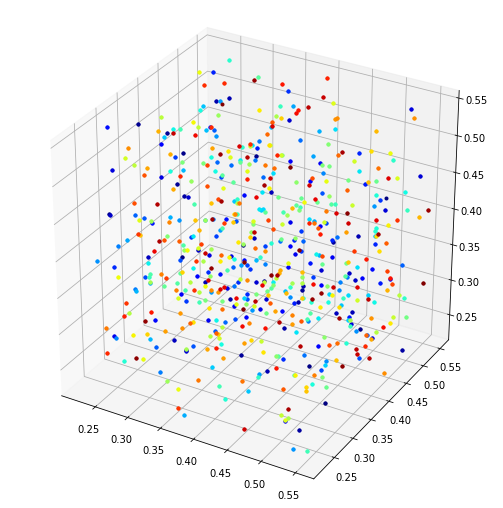

In [17]:
# Noise

data_diff = data_with_noised - data_loaded

fig = plt.figure(figsize=(9, 9))
ax = fig.gca(projection='3d')

for i in range(1, len(data_diff)):
    line = ax.plot(data_diff[i-1:i+1, 0], 
            data_diff[i-1:i+1, 1], 
            data_diff[i-1:i+1, 2], 
            '.',
            c = plt.cm.jet(i / len(data_diff)))
    
ax.set_box_aspect((1, 1, 1))

plt.show()

* Read 600 lines from trajectory.csv
* data.shape: (600, 4)


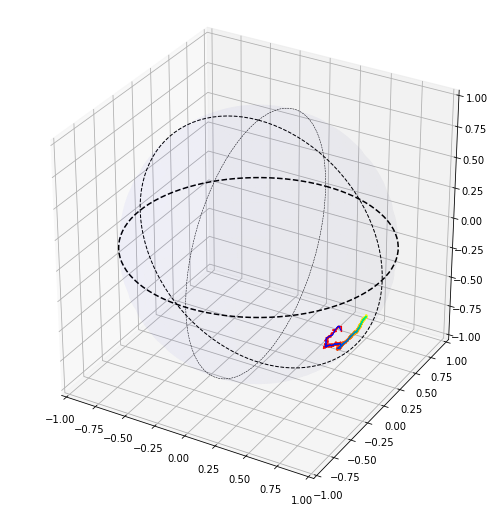

In [18]:
# position-to-Yaw/Pitch

data_loaded = list()

with open(FILE_NAME, 'r') as f:
    csv_reader = csv.reader(f)
    
    col_name = next(csv_reader)
    
    line_count = 0
    
    for line in csv_reader:
        data_loaded.append([float(value) for value in line])
        line_count += 1

    data_loaded = np.array(data_loaded)
        
    print(f'* Read {line_count} lines from {FILE_NAME}')
    print(f'* data.shape: {data_loaded.shape}')

yaw_pitch_data = list()
unit_circle_data = list()
unit_circle_data_with_noise = list()

for data in data_loaded:
    t, x, y, z = data
    r = np.sqrt(x ** 2 + y ** 2 + z ** 2)
    
    theta = np.arctan2(x, y)
    phi = np.arcsin(z / r)
    
    yaw_pitch_data.append([t, theta, phi])
    
    unit_circle_data.append([t, 
                             1 * np.cos(phi) * np.cos(theta), 
                             1 * np.cos(phi) * np.sin(theta), 
                             1 * np.sin(phi)])
    
    theta += 1/90 * np.pi * (np.random.random() - 0.5)
    phi += 1/90 * np.pi * (np.random.random() - 0.5)
    
    unit_circle_data_with_noise.append([t, 
                             1 * np.cos(phi) * np.cos(theta), 
                             1 * np.cos(phi) * np.sin(theta), 
                             1 * np.sin(phi)])
    
yaw_pitch_data = np.array(yaw_pitch_data)
unit_circle_data = np.array(unit_circle_data)
unit_circle_data_with_noise = np.array(unit_circle_data_with_noise)

fig = plt.figure(figsize=(9, 9))
ax = fig.gca(projection='3d')

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
w = np.zeros(len(u))

x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.02)
ax.plot(np.sin(u), np.cos(u), w, color='k', linewidth=1.5, linestyle = 'dashed')
ax.plot(np.sin(u), w, np.cos(u), color='k', linewidth=1, linestyle = 'dashed')
ax.plot(w, np.sin(u), np.cos(u), color='k', linewidth=.5, linestyle = 'dashed')
    
for i in range(1, len(unit_circle_data_with_noise)):
    ax.plot(unit_circle_data_with_noise[i-1:i+1, 1], 
            unit_circle_data_with_noise[i-1:i+1, 2], 
            unit_circle_data_with_noise[i-1:i+1, 3],
            c = plt.cm.autumn(i / len(unit_circle_data_with_noise)))

for i in range(1, len(unit_circle_data)):
    ax.plot(unit_circle_data[i-1:i+1, 1], 
            unit_circle_data[i-1:i+1, 2], 
            unit_circle_data[i-1:i+1, 3], 
            linewidth=1,
            c = plt.cm.winter(i / len(unit_circle_data)))
    
ax.set_xlim3d([-1, 1])
ax.set_ylim3d([-1, 1])
ax.set_zlim3d([-1, 1])
ax.set_box_aspect((1, 1, 1))

plt.show()